# PCA on NN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import BallTree
from sklearn.decomposition import PCA
import pandas
import sys
sys.path.append('../src/')
from diffusion_maps_tools import *
# Matplotlib setup
plt.style.use('seaborn-white')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.rc('font', family='serif')
%matplotlib notebook
%matplotlib notebook

In [2]:
filename = 'input.xlsx'
input_array = np.array(pandas.read_excel(filename, skiprows=2).iloc[:, 1:])
print('The shape of input array is {}'.format(input_array.shape))

The shape of input array is (999, 7)


In [3]:
data_dmap = input_array[:900,:6]
print('The shape of input array is {}'.format(data_dmap.shape))
kon1 =data_dmap[:,0] 
kon2 =data_dmap[:,1]
koff1=data_dmap[:,2]
koff2=data_dmap[:,3]
kcat1=data_dmap[:,4]
kcat2=data_dmap[:,5]

The shape of input array is (900, 6)


In [4]:
#minmax_scaler = MinMaxScaler(feature_range=(0,1)).fit(data_dmap)
#input_scaled = minmax_scaler.transform(data_dmap)
input_scaled = data_dmap

### Find the `knn` Nearest Neighbors to the row=nrow

In [5]:
knn  = 800
nrow = 15
tree = BallTree(input_scaled)
dist, ind = tree.query(input_scaled, k=knn)
neigh = input_scaled[ind[nrow,1:]]
# print('The picked point is :','\n',input_scaled[nrow,:])
# print('The Nearest Neighbors are :','\n',neigh)

### Fit PCA on knn points, use the first ndim of eigenvectors

In [6]:
ndim = 3
pca = PCA(n_components=ndim)
psi = pca.fit_transform(neigh)

<IPython.core.display.Javascript object>


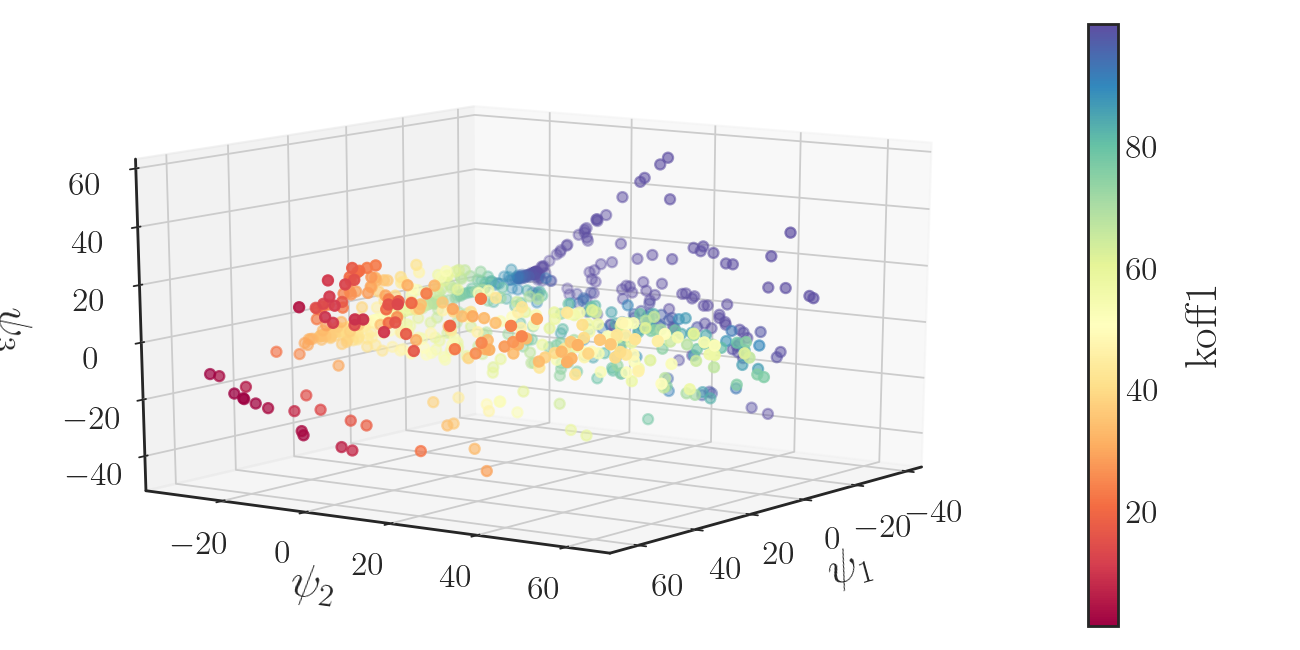

In [12]:
%matplotlib notebook
%matplotlib notebook
plt.figure(figsize=(8,4))
ax = plt.subplot(111, projection='3d')
p = ax.scatter(psi[:,0],
               psi[:,1],
               psi[:,2],
               c= koff1[ind[nrow,1:]],
               cmap= 'Spectral',
               rasterized=True)
ax.set_xlabel(r'$\psi_1$')
ax.set_ylabel(r'$\psi_2$')
ax.set_zlabel(r'$\psi_3$')
cbar = plt.colorbar(p)
cbar.set_label(r'koff1')
# The fix
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
